**Exercise 1**

In [1]:
from google.cloud import bigquery
import pandas as pd

In [2]:
client = bigquery.Client()

query = '''
select miner, count (timestamp) as times, status
from 
  (select miner, timestamp, "pre_merger" as status 
  from `bigquery-public-data.crypto_ethereum.blocks`
  where timestamp between '2022-09-14 06:42:42' and '2022-09-15 06:42:42'
  UNION ALL 
  select miner, timestamp, "post_merger" as status
  from `bigquery-public-data.crypto_ethereum.blocks`
  where timestamp between '2022-11-11 17:29:23' and '2022-11-12 17:29:23')
group by status, miner
'''

Using Kaggle's public dataset BigQuery integration.


In [3]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

df.head(5)

,miner,times,status
0,0x0000000000000000000000000000000000000001,10,post_merger
1,0x001ee00bee25f81444e2d172773f37fe05ea2488,4,post_merger
2,0x0038598ecb3b308ebc6c6e2c635bacaa3c5298a3,6,post_merger
3,0x0077732907bfc6208933cfd2a51afb8f33ca5958,3,post_merger
4,0x04241b41ecbd0bfdf1295e9d4fa59ea09e6c6186,1,post_merger


In [4]:
df_premerge = df [(df["status"]=='pre_merger')]
df_posmerge = df [(df["status"]=='post_merger')]

df_premerge.sort_values (by='times', ascending=False, inplace= True)
df_premerge.reset_index(drop=True, inplace=True)

df_posmerge.sort_values (by='times', ascending=False, inplace= True)
df_posmerge.reset_index(drop=True, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [5]:
df_premerge["times_%"]= (df_premerge['times']/ df_premerge.times.sum())*100

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
pre_mean=df_premerge["times_%"].mean()
pre_median=df_premerge["times_%"].median()

In [7]:
df_posmerge["times_%"]= (df_posmerge['times']/ df_posmerge.times.sum())*100
pos_mean= df_posmerge["times_%"].mean()
pos_median= df_posmerge["times_%"].median()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


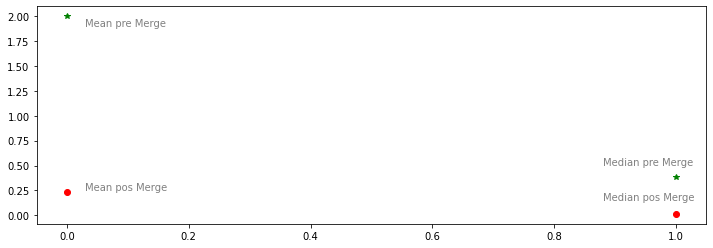

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 4))
plt.plot([pre_mean,pre_median],'g*', [pos_mean,pos_median], 'ro')

style = dict(size=10, color='gray')
ax.text(0.03, 1.9, "Mean pre Merge", **style)
ax.text(0.88, 0.5, "Median pre Merge", **style)
ax.text(0.03, 0.25, "Mean pos Merge", **style)
ax.text(0.88, 0.15, "Median pos Merge", **style)
plt.show()

**Exercise 2**

In [9]:
query = '''
select year, difficulty
from 
(select  EXTRACT(YEAR FROM timestamp) AS year, avg (difficulty) as difficulty
from `bigquery-public-data.crypto_ethereum.blocks`
group by year)
where year > 1970
order by year
'''
query_job = client.query(query)
iterator = query_job.result(timeout=30)
rows = list(iterator)
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

df.head(10)
df['difficulty']=df['difficulty'].astype(int)

<AxesSubplot:xlabel='year'>

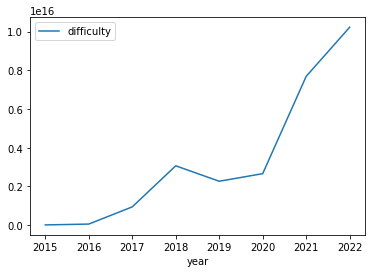

In [10]:
df.plot('year' , 'difficulty')

Exercise 3

In [11]:
query = '''select Year, count (hashes) as transactions, gas_price
from 
(select  EXTRACT(YEAR FROM block_timestamp) AS Year, "hash" as hashes, gas_price, receipt_status
from `bigquery-public-data.crypto_ethereum.transactions` 
where gas_price = 0 
and receipt_status = 1)
group by Year, gas_price
order by Year'''

query_job = client.query(query)
iterator = query_job.result(timeout=30)
rows = list(iterator)
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

df.head(10)

,Year,transactions,gas_price
0,2017,585,0
1,2018,109855,0
2,2019,167352,0
3,2020,106914,0
4,2021,1561017,0


<AxesSubplot:xlabel='Year'>

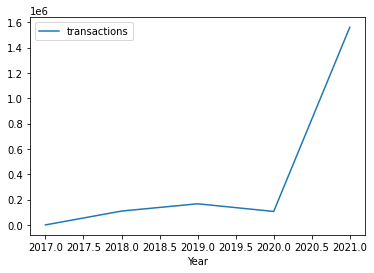

In [12]:
df.plot('Year' , 'transactions')